## 프로젝트 목표
- 한국어 원문 데이터(법원 판결문)의 요약문을 카테고리('일반행정', '세무', '특허', '형사', '민사', '가사')별로 분류하는 프로젝트 수행

---

## 데이터 출처
-  https://aihub.or.kr/aidata/8054

---

## 실행 방법
같은 파일에 넣고 실행

In [1]:
!pip install --upgrade aiohttp



     |▎                               | 10 kB 43.9 MB/s eta 0:00:01
     |▌                               | 20 kB 23.5 MB/s eta 0:00:01
     |▉                               | 30 kB 15.2 MB/s eta 0:00:01
     |█                               | 40 kB 13.5 MB/s eta 0:00:01
     |█▎                              | 51 kB 11.5 MB/s eta 0:00:01
     |█▋                              | 61 kB 13.6 MB/s eta 0:00:01
     |█▉                              | 71 kB 13.9 MB/s eta 0:00:01
     |██                              | 81 kB 15.7 MB/s eta 0:00:01
     |██▍                             | 92 kB 15.4 MB/s eta 0:00:01
     |██▋                             | 102 kB 16.2 MB/s eta 0:00:01
     |██▉                             | 112 kB 16.2 MB/s eta 0:00:01
     |███▏                            | 122 kB 16.2 MB/s eta 0:00:01
     |███▍                            | 133 kB 16.2 MB/s eta 0:00:01
     |███▊                            | 143 kB 16.2 MB/s eta 0:00:01
     |████                            | 1

     |████████████████████████████████| 319 kB 101.2 MB/s            
     |████████████████████████████████| 129 kB 115.5 MB/s            
     |████████████████████████████████| 243 kB 117.6 MB/s            
     |████████████████████████████████| 213 kB 124.1 MB/s            
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.12.2 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.8 -m pip install --upgrade pip' command.


## 1. 데이터 읽기

pandas를 사용하여 `project_data_all3.json` 데이터를 읽고 dataframe 형태로 저장해 봅시다.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트를 사용하기 위한 코드
font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
plt.rc('font', family='NanumBarunGothic') 

In [3]:
# 데이터 파일 경로 정의하기
fp = './project_data_all3.json'

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
tf.random.set_seed(0)

In [5]:
# json 파일 읽기
df = pd.read_json(fp)
df.head()

,id,category,size,char_count,publish_date,title,text,annotator_id,document_quality_scores,extractive,abstractive
0,83587,일반행정,small,509,20041125,사도개설허가취소신청거부처분취소,"[[{'index': 0, 'sentence': '[1] 취소소송은 처분 등이 있음...",3852,"{'readable': 3, 'accurate': 4, 'informative': ...","[0, 4, 6]","[취소소송은 처분 등이 있다는 것을 안 때로부터 90일 이내에 제기하여야 하고, 행..."
1,83588,일반행정,medium,845,20041126,노선배분취소처분취소·국제선정기항공운송사업노선면허거부처분취소,"[[{'index': 0, 'sentence': '[1] 항고소송의 대상이 되는 행...",3814,"{'readable': 4, 'accurate': 4, 'informative': ...","[0, 4, 9]",[항고소송의 대상이 되는 행정처분이란 일반 국민의 권리의무에 직접 영향을 미치는 행...
2,83590,세무,small,425,20041125,취득세부과처분취소,"[[{'index': 0, 'sentence': '취득세는 본래 재화의 이전이라는 ...",3710,"{'readable': 3, 'accurate': 3, 'informative': ...","[1, 2, 3]","[취득세는 사실상의 취득행위 자체를 과세객체로 하고, 지방세법에 따르면 부동산 취득..."
3,83591,세무,small,292,20041126,관세부과처분취소,"[[{'index': 0, 'sentence': '[1] 행정처분이 당연무효라고 하...",3708,"{'readable': 3, 'accurate': 3, 'informative': ...","[0, 1, 5]","[행정처분이 당연무효라고 하기 위해서는 하자가 중대, 명백해야 하는데 세관출장소장이..."
4,83592,특허,small,275,20041126,거절결정(상),"[[{'index': 0, 'sentence': '[1] 등록출원한 상표가 상표법 ...",4255,"{'readable': 5, 'accurate': 5, 'informative': ...","[0, 1, 3]",[상표법에 따라 상표가 등록받을 수 있는지의 여부는 구체적으로 판단하므로 출원상표 ...


In [6]:
# 먼저 카테고리 종류를 확인
df.category.unique()

array(['일반행정', '세무', '특허', '형사', '민사', '가사'], dtype=object)

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

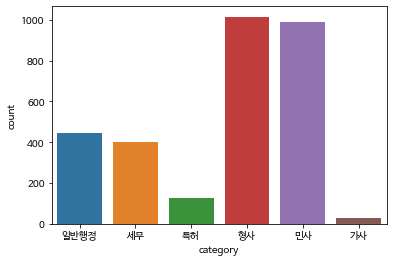

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 카테고리 분포 확인
fig, axe = plt.subplots(ncols=1)
sns.countplot(df.category)

In [8]:
# category 컬럼 데이터 변경
df['category'] = df['category'].replace({'가사': 0, '형사': 1, '특허': 2, '민사': 3, '일반행정': 4, '세무': 5})

In [9]:
df['category']

0       4
1       4
2       5
3       5
4       2
       ..
2999    1
3000    1
3001    3
3002    2
3003    5
Name: category, Length: 3004, dtype: int64

In [10]:
target = df['category'].values

# 데이터의 개수를 확인
print(len(target))

3004


In [11]:
df['abstractive']

0       [취소소송은 처분 등이 있다는 것을 안 때로부터 90일 이내에 제기하여야 하고, 행...
1       [항고소송의 대상이 되는 행정처분이란 일반 국민의 권리의무에 직접 영향을 미치는 행...
2       [취득세는 사실상의 취득행위 자체를 과세객체로 하고, 지방세법에 따르면 부동산 취득...
3       [행정처분이 당연무효라고 하기 위해서는 하자가 중대, 명백해야 하는데 세관출장소장이...
4       [상표법에 따라 상표가 등록받을 수 있는지의 여부는 구체적으로 판단하므로 출원상표 ...
                              ...                        
2999    [특정범죄가중처벌등에관한 법률 제5조의4 제1항 소정의 상습범으로 기소된 공소사실에...
3000    [피해자가 자정 가까운 시간에 점포 폐점으로 오래된 빵을 별 다른 주의의무 없이 점...
3001    [전세나 임대차계약에 있어 전세보증금은 특별한 사정이 없다면 임차인의 임차가옥 명도...
3002    [출원상표와 인용상표는 외관적으로는 전체적으로 다르게 보이지만 호칭에 있어서는 거래...
3003    [한국마사회의 경마사업으로 인한 소득은 그 사업이 비영리법인인 위 마사회의 고유사업...
Name: abstractive, Length: 3004, dtype: object

In [12]:
data = df['abstractive'].values

# 데이터의 개수를 확인
print(len(data))

3004


---

## 2. 형태소 분석하기

In [13]:
# 판결요약문을 KoNLPy 의 Okt 클래스로 형태소 분석
from konlpy.tag import Okt

# Okt 객체 선언
okt = Okt()

# stemming기반 형태소 분석
# 먼저 요약문 1개만 품사 태깅을 해보겠습니다.
pos_results = okt.pos(data[0][0], norm=True, stem=True)

# 품사를 태깅한다는 것은 주어진 텍스트를 형태소 단위로 나누고 명사, 조사, 동사 등의 형태소를 배열 형태로 만다는 과정입니다.
print(pos_results)

[('취소소송', 'Noun'), ('은', 'Josa'), ('처분', 'Noun'), ('등', 'Noun'), ('이', 'Josa'), ('있다', 'Adjective'), ('것', 'Noun'), ('을', 'Josa'), ('안', 'Noun'), ('때', 'Noun'), ('로부터', 'Noun'), ('90일', 'Number'), ('이내', 'Noun'), ('에', 'Josa'), ('제기', 'Noun'), ('하다', 'Verb'), ('하다', 'Verb'), (',', 'Punctuation'), ('행정처분', 'Noun'), ('에서의', 'Josa'), ('허가', 'Noun'), ('에', 'Josa'), ('붙다', 'Verb'), ('기한', 'Noun'), ('이', 'Josa'), ('부당하다', 'Adjective'), ('짧다', 'Adjective'), ('경우', 'Noun'), ('에는', 'Josa'), ('이르다', 'Verb'), ('허가', 'Noun'), ('조건', 'Noun'), ('존속', 'Noun'), ('기간', 'Noun'), ('으로', 'Josa'), ('보아', 'Noun'), ('서', 'Josa'), ('그', 'Noun'), ('기한', 'Noun'), ('의', 'Josa'), ('도래', 'Noun'), ('로', 'Josa'), ('조건', 'Noun'), ('개정', 'Noun'), ('을', 'Josa'), ('고려', 'Noun'), ('하다', 'Verb'), ('해석', 'Noun'), ('하다', 'Verb'), ('수', 'Noun'), ('있다', 'Adjective'), (',', 'Punctuation'), ('사도', 'Noun'), ('개설', 'Noun'), ('허가', 'Noun'), ('의', 'Josa'), ('준공', 'Noun'), ('검사', 'Noun'), ('를', 'Josa'), ('받다', 'Verb'), ('못', 'Noun')

In [14]:
from konlpy.tag import Okt

# 명사와 동사를 추출하여 저장
data_tokenized = []

for text in data:
    # 형태소와 품사를 함께 추출
    pos_tags = okt.pos(text[0])
    # 명사(Noun)와 동사(Verb)만 필터링
    filtered_words = [word for word, pos in pos_tags if pos in ['Noun', 'Verb']]
    data_tokenized.append(filtered_words)

# 결과 확인
print(data_tokenized[0])

['취소소송', '처분', '등', '것', '안', '때', '로부터', '이내', '제기', '하여야', '하고', '행정처분', '허가', '붙은', '기한', '경우', '이를', '허가', '조건', '존속', '기간', '보아', '그', '기한', '도래', '조건', '개정', '고려', '한다고', '해석', '할', '수', '사도', '개설', '허가', '준공', '검사', '받지', '못', '것', '사도', '개설', '허가', '자체', '존속', '기간', '볼', '수', '까닭', '것', '실효', '되는', '것']


In [15]:
# 형태소 분석 결과의 개수를 확인. 이전에 확인한 개수와 동일한 것을 확인할 수 있습니다.
print(len(data_tokenized))

3004


판결 요약문의 최대 길이 :186
판결 요약문의 평균 길이 :51.760985352862846


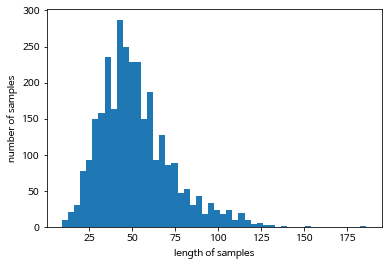

In [16]:
print('판결 요약문의 최대 길이 :{}'.format(max(len(l) for l in data_tokenized)))
print('판결 요약문의 평균 길이 :{}'.format(sum(map(len, data_tokenized))/len(data_tokenized)))

plt.hist([len(s) for s in data_tokenized], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

---

## 3. 케라스(Keras)의 텍스트 전처리

In [17]:
# Keras의 텍스트 전처리기를 이용하여 정수 인코딩
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

# fit_on_texts()안에 형태소 분석된 데이터를 입력으로 넣으면 빈도수를 기준으로 단어 집합을 생성
tokenizer.fit_on_texts(data_tokenized) 

In [18]:
# 각 단어에 부여된 인덱스 확인
print(tokenizer.word_index)

{'제': 1, '것': 2, '할': 3, '수': 4, '그': 5, '하는': 6, '경우': 7, '하여': 8, '된': 9, '위': 10, '행위': 11, '등': 12, '해당': 13, '하지': 14, '관': 15, '법': 16, '대한': 17, '처분': 18, '항': 19, '규정': 20, '사실': 21, '한': 22, '피고인': 23, '및': 24, '이': 25, '되는': 26, '볼': 27, '때': 28, '인정': 29, '토지': 30, '원고': 31, '구': 32, '회사': 33, '한다': 34, '등기': 35, '이를': 36, '후': 37, '청구': 38, '함': 39, '계약': 40, '사업': 41, '대하': 42, '취득': 43, '되지': 44, '의무': 45, '되어': 46, '목적': 47, '판단': 48, '될': 49, '피고': 50, '시행': 51, '지급': 52, '취소': 53, '따라': 54, '판결': 55, '대상': 56, '사용': 57, '위반': 58, '결정': 59, '성립': 60, '위법': 61, '과세': 62, '사건': 63, '사유': 64, '여부': 65, '부동산': 66, '죄': 67, '소유권': 68, '거래': 69, '내용': 70, '사정': 71, '하여야': 72, '권리': 73, '법률': 74, '이유': 75, '허가': 76, '기간': 77, '하기': 78, '절차': 79, '이전': 80, '발생': 81, '양도': 82, '세법': 83, '받은': 84, '로서': 85, '채권': 86, '기재': 87, '업무': 88, '재산': 89, '금': 90, '적용': 91, '이익': 92, '하고': 93, '변경': 94, '관계': 95, '정': 96, '다른': 97, '중': 98, '상의': 99, '책임': 100, '무효': 101, '손해': 102, '신청':

In [19]:
# 각 단어의 사용 빈도수 확인
print(tokenizer.word_counts)

OrderedDict([('취소소송', 22), ('처분', 719), ('등', 949), ('것', 2626), ('안', 61), ('때', 584), ('로부터', 122), ('이내', 23), ('제기', 191), ('하여야', 290), ('하고', 256), ('행정처분', 109), ('허가', 287), ('붙은', 2), ('기한', 59), ('경우', 1657), ('이를', 439), ('조건', 85), ('존속', 40), ('기간', 286), ('보아', 209), ('그', 2243), ('도래', 13), ('개정', 71), ('고려', 112), ('한다고', 84), ('해석', 155), ('할', 2378), ('수', 2253), ('사도', 7), ('개설', 43), ('준공', 36), ('검사', 92), ('받지', 70), ('못', 68), ('자체', 116), ('볼', 597), ('까닭', 3), ('실효', 23), ('되는', 610), ('항고소송', 19), ('대상', 343), ('일반', 92), ('국민', 42), ('권리', 290), ('의무', 380), ('직접', 132), ('영향', 92), ('행위', 1051), ('가리키는', 10), ('정부', 44), ('간', 38), ('항공', 8), ('노선', 5), ('관', 800), ('잠정', 4), ('협정', 5), ('및', 621), ('비밀', 26), ('양해각서', 1), ('건설', 75), ('교통부', 7), ('내부', 28), ('지침', 13), ('대한', 721), ('운수', 35), ('배분', 3), ('해당', 917), ('공익', 71), ('상의', 249), ('필요', 109), ('비해', 10), ('상대방', 127), ('받게', 24), ('불이익', 67), ('더욱', 3), ('큰', 8), ('재량', 95), ('한계', 27), ('탈', 45

In [20]:
# 상위 1000개 단어만 학습에 사용

vocab_size = 1000
tokenizer = Tokenizer(num_words = vocab_size) 
tokenizer.fit_on_texts(data_tokenized)

In [21]:
# 판결요약문 데이터를 인덱스로 변환
data_index = tokenizer.texts_to_sequences(data_tokenized)
print(data_index[0])

[18, 12, 2, 450, 28, 228, 149, 72, 93, 262, 76, 467, 7, 36, 76, 344, 678, 77, 135, 5, 467, 344, 394, 252, 347, 177, 3, 4, 639, 76, 743, 311, 401, 409, 2, 639, 76, 243, 678, 77, 27, 4, 2, 26, 2]


---

## 4. LSTM으로 판결 요약문 분류하기

In [22]:
# LSTM으로 판결요약문 분류하기
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, BatchNormalization, Bidirectional, LayerNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import GlorotUniform

# class 비율(train:validation)에 유지하기 위해 stratify 옵션을 target으로 지정
X_train, X_test, y_train, y_test = train_test_split(data_index, target, test_size=0.2, stratify=target, random_state=100)

In [23]:
# 훈련용 판결요약문과 테스트용 판결요약문의 길이, 즉 단어수를 50으로 일치
# 단어수가 50개보다 많으면 나머지는 제거하고 모자르면 0으로 채워짐
max_len = 50

X_train = pad_sequences(X_train, maxlen=max_len) # 훈련용 판결요약문 패딩
X_test = pad_sequences(X_test, maxlen=max_len) # 테스트용 판결요약문 패딩

In [24]:
# 훈련용, 테스트용 판결요약문 데이터의 레이블을 원-핫 인코딩

y_train = to_categorical(y_train) # 훈련용 판결요약문 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 판결요약문 레이블의 원-핫 인코딩

In [25]:
def build_model_1():
    model = Sequential()
    model.add(Embedding(input_dim=1000, output_dim=32))  # 임베딩 차원 축소
    model.add(LSTM(32, kernel_regularizer=l2(0.001)))
    model.add(LayerNormalization())
    model.add(Dropout(0.4))  # Dropout 0.4
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Nadam(learning_rate=0.0001),  # 학습률을 더 낮게 설정
                  metrics=['acc'])
    return model

def build_model_2():
    model = Sequential()
    model.add(Embedding(input_dim=1000, output_dim=32))
    model.add(Bidirectional(LSTM(32, kernel_regularizer=l2(0.001), return_sequences=True)))  # 첫 번째 LSTM에 return_sequences=True 추가
    model.add(LayerNormalization())
    model.add(Dropout(0.3))
    model.add(Bidirectional(LSTM(32, kernel_regularizer=l2(0.001))))  # 두 번째 LSTM은 return_sequences=False로 기본 설정
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Nadam(learning_rate=0.0001),
                  metrics=['acc'])
    return model


def build_model_3():
    model = Sequential()
    model.add(Embedding(input_dim=1000, output_dim=32))
    model.add(LSTM(32, kernel_regularizer=l2(0.001), return_sequences=True))  # return_sequences=True
    model.add(LayerNormalization())
    model.add(Dropout(0.3))
    model.add(Bidirectional(LSTM(32, kernel_regularizer=l2(0.001), return_sequences=False)))  # return_sequences=False
    model.add(LayerNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Nadam(learning_rate=0.0001),
                  metrics=['acc'])
    return model

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [28]:
# 모델 학습
model_1 = build_model_1()
mc_1 = ModelCheckpoint('model_1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history_1 = model_1.fit(X_train, y_train, batch_size=16, epochs=30, validation_data=(X_test, y_test), callbacks=[es, mc_1])

model_2 = build_model_2()
mc_2 = ModelCheckpoint('model_2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history_2 = model_2.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test), callbacks=[es, mc_2])

model_3 = build_model_3()
mc_3 = ModelCheckpoint('model_3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history_3 = model_3.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test), callbacks=[es, mc_3])

Epoch 1/30
151/151 [==============================] - 6s 28ms/step - loss: 1.7606 - acc: 0.2685 - val_loss: 1.5038 - val_acc: 0.3927

Epoch 00001: val_acc improved from -inf to 0.39268, saving model to model_1.h5
Epoch 2/30
151/151 [==============================] - 2s 15ms/step - loss: 1.5108 - acc: 0.3863 - val_loss: 1.4205 - val_acc: 0.4443

Epoch 00002: val_acc improved from 0.39268 to 0.44426, saving model to model_1.h5
Epoch 3/30
151/151 [==============================] - 2s 15ms/step - loss: 1.4110 - acc: 0.4473 - val_loss: 1.3317 - val_acc: 0.5025

Epoch 00003: val_acc improved from 0.44426 to 0.50250, saving model to model_1.h5
Epoch 4/30
151/151 [==============================] - 2s 14ms/step - loss: 1.3014 - acc: 0.5320 - val_loss: 1.2098 - val_acc: 0.5458

Epoch 00004: val_acc improved from 0.50250 to 0.54576, saving model to model_1.h5
Epoch 5/30
151/151 [==============================] - 2s 15ms/step - loss: 1.1122 - acc: 0.6084 - val_loss: 1.0618 - val_acc: 0.6040

Epoch

76/76 [==============================] - 5s 66ms/step - loss: 0.5182 - acc: 0.9108 - val_loss: 0.9566 - val_acc: 0.7521

Epoch 00018: val_acc did not improve from 0.77205
Epoch 19/30
76/76 [==============================] - 5s 66ms/step - loss: 0.4925 - acc: 0.9150 - val_loss: 0.9101 - val_acc: 0.7937

Epoch 00019: val_acc improved from 0.77205 to 0.79368, saving model to model_2.h5
Epoch 20/30
76/76 [==============================] - 5s 65ms/step - loss: 0.4455 - acc: 0.9383 - val_loss: 0.9313 - val_acc: 0.7737

Epoch 00020: val_acc did not improve from 0.79368
Epoch 00020: early stopping
Epoch 1/30
76/76 [==============================] - 19s 91ms/step - loss: 2.7767 - acc: 0.1664 - val_loss: 1.6254 - val_acc: 0.3993

Epoch 00001: val_acc improved from -inf to 0.39933, saving model to model_3.h5
Epoch 2/30
76/76 [==============================] - 4s 50ms/step - loss: 1.8564 - acc: 0.3402 - val_loss: 1.5354 - val_acc: 0.4526

Epoch 00002: val_acc improved from 0.39933 to 0.45258, savi

In [29]:
predictions_1 = model_1.predict(X_test)
predictions_2 = model_2.predict(X_test)
predictions_3 = model_3.predict(X_test)

In [30]:
# 예측값 평균을 내서 최종 예측 생성
final_predictions = (predictions_1 + predictions_2 + predictions_3) / 3
final_predictions = np.argmax(final_predictions, axis=1)

# 앙상블 모델 정확도 확인
from sklearn.metrics import accuracy_score
print(f"Ensemble Model Accuracy: {accuracy_score(np.argmax(y_test, axis=1), final_predictions):.4f}")

Ensemble Model Accuracy: 0.8303


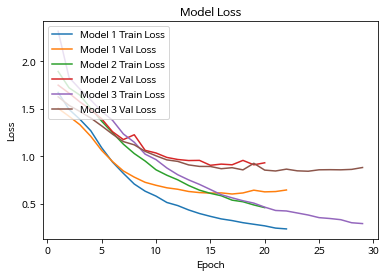

In [31]:
# 모델 1 학습 손실 및 검증 손실 그래프
epochs_1 = range(1, len(history_1.history['acc']) + 1)
plt.plot(epochs_1, history_1.history['loss'], label='Model 1 Train Loss')
plt.plot(epochs_1, history_1.history['val_loss'], label='Model 1 Val Loss')

# 모델 2 학습 손실 및 검증 손실 그래프
epochs_2 = range(1, len(history_2.history['acc']) + 1)
plt.plot(epochs_2, history_2.history['loss'], label='Model 2 Train Loss')
plt.plot(epochs_2, history_2.history['val_loss'], label='Model 2 Val Loss')

# 모델 3 학습 손실 및 검증 손실 그래프
epochs_3 = range(1, len(history_3.history['acc']) + 1)
plt.plot(epochs_3, history_3.history['loss'], label='Model 3 Train Loss')
plt.plot(epochs_3, history_3.history['val_loss'], label='Model 3 Val Loss')

# 그래프 제목 및 레이블
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

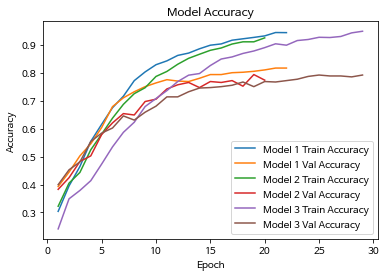

In [32]:
# 모델 1 학습 정확도 및 검증 정확도 그래프
epochs_1 = range(1, len(history_1.history['acc']) + 1)
plt.plot(epochs_1, history_1.history['acc'], label='Model 1 Train Accuracy')
plt.plot(epochs_1, history_1.history['val_acc'], label='Model 1 Val Accuracy')

# 모델 2 학습 정확도 및 검증 정확도 그래프
epochs_2 = range(1, len(history_2.history['acc']) + 1)
plt.plot(epochs_2, history_2.history['acc'], label='Model 2 Train Accuracy')
plt.plot(epochs_2, history_2.history['val_acc'], label='Model 2 Val Accuracy')

# 모델 3 학습 정확도 및 검증 정확도 그래프
epochs_3 = range(1, len(history_3.history['acc']) + 1)
plt.plot(epochs_3, history_3.history['acc'], label='Model 3 Train Accuracy')
plt.plot(epochs_3, history_3.history['val_acc'], label='Model 3 Val Accuracy')

# 그래프 제목 및 레이블
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

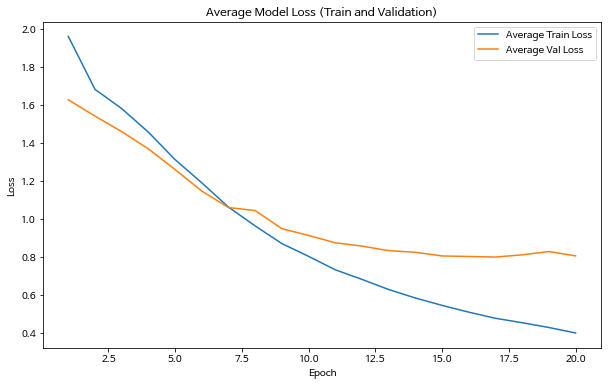

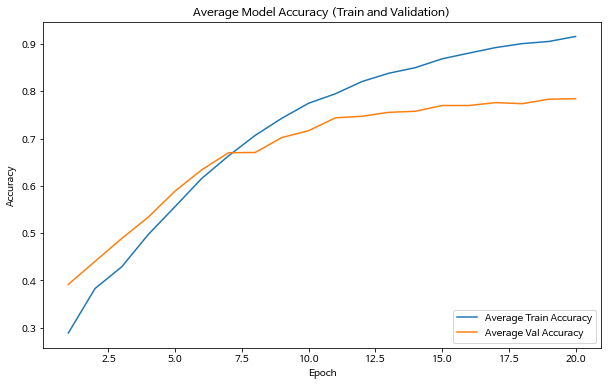

In [33]:
# 세 모델의 학습 에포크 수 중 최소값으로 설정
min_epochs = min(len(history_1.history['acc']), len(history_2.history['acc']), len(history_3.history['acc']))

# 각 에포크에서 모델 손실의 평균 계산
avg_train_loss = np.mean(
    [history_1.history['loss'][:min_epochs], 
     history_2.history['loss'][:min_epochs], 
     history_3.history['loss'][:min_epochs]], 
    axis=0
)
avg_val_loss = np.mean(
    [history_1.history['val_loss'][:min_epochs], 
     history_2.history['val_loss'][:min_epochs], 
     history_3.history['val_loss'][:min_epochs]], 
    axis=0
)

# 각 에포크에서 모델 정확도의 평균 계산
avg_train_acc = np.mean(
    [history_1.history['acc'][:min_epochs], 
     history_2.history['acc'][:min_epochs], 
     history_3.history['acc'][:min_epochs]], 
    axis=0
)
avg_val_acc = np.mean(
    [history_1.history['val_acc'][:min_epochs], 
     history_2.history['val_acc'][:min_epochs], 
     history_3.history['val_acc'][:min_epochs]], 
    axis=0
)

# 에포크 범위 설정
epochs = range(1, min_epochs + 1)

# 평균 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, avg_train_loss, label='Average Train Loss')
plt.plot(epochs, avg_val_loss, label='Average Val Loss')
plt.title('Average Model Loss (Train and Validation)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# 평균 정확도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, avg_train_acc, label='Average Train Accuracy')
plt.plot(epochs, avg_val_acc, label='Average Val Accuracy')
plt.title('Average Model Accuracy (Train and Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()
